In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Install kaggle package quietly
!pip install -q kaggle==1.5.12
# Create a kaggle folder
!mkdir ~/.kaggle
# Copy json file into the kaggle folder
!cp /content/gdrive/MyDrive/recording/airlines-delay/kaggle.json ~/.kaggle/
# Give full read & write permission only to the owner
!chmod 600 ~/.kaggle/kaggle.json
# Download the airline delay dataset
!kaggle datasets download -d giovamata/airlinedelaycauses
# Unzip the downloaded dataset
!unzip airlinedelaycauses.zip
# Delete the zip file
!rm -rf airlinedelaycauses.zip
!rm -rf st99*

# Unmount the gdrive
drive.flush_and_unmount()

 80% 53.0M/66.6M [00:00<00:00, 191MB/s]
100% 66.6M/66.6M [00:00<00:00, 166MB/s]
Archive:  airlinedelaycauses.zip
  inflating: DelayedFlights.csv      
  inflating: st99_d00.dbf            
  inflating: st99_d00.shp            
  inflating: st99_d00.shx            


In [ ]:
# Import the modules
import pandas as pd

# Load the data
df = pd.read_csv(filepath_or_buffer="/content/DelayedFlights.csv")
# Trace
df.sample(n=10, random_state=42)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1782417,6583804,2008,12,6,6,1805.0,1755,2146.0,2035,YV,...,5.0,99.0,0,N,0,71.0,0.0,0.0,0.0,0.0
512712,1604365,2008,3,23,7,2120.0,1200,2241.0,1333,NW,...,7.0,19.0,0,N,0,543.0,0.0,0.0,0.0,5.0
447137,1395655,2008,3,31,1,1731.0,1710,1819.0,1810,OO,...,3.0,1.0,0,N,0,NaN,NaN,NaN,NaN,NaN
55082,178786,2008,1,6,7,1507.0,1413,1601.0,1509,OO,...,5.0,17.0,0,N,0,0.0,0.0,0.0,0.0,52.0
877634,2972767,2008,5,22,4,637.0,630,812.0,750,CO,...,5.0,16.0,0,N,0,0.0,0.0,15.0,7.0,0.0
1056704,3524060,2008,6,12,4,2136.0,2125,2300.0,2230,AA,...,13.0,17.0,0,N,0,11.0,0.0,19.0,0.0,0.0
198754,643114,2008,2,14,4,1807.0,1800,1910.0,1900,WN,...,7.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
532837,1672481,2008,3,23,7,1315.0,1305,1937.0,1915,AA,...,24.0,22.0,0,N,0,0.0,0.0,22.0,0.0,0.0
1293928,4332778,2008,8,31,7,1550.0,1530,1704.0,1652,XE,...,3.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN
749884,2454537,2008,5,22,4,1814.0,1640,1923.0,1755,WN,...,5.0,12.0,0,N,0,15.0,0.0,0.0,0.0,73.0


In [ ]:
# Delete the "Unnamed: 0" feature
df = df.drop(columns=["Unnamed: 0"], axis=1)
# Trace
df.sample(n=3, random_state=42)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1782417,2008,12,6,6,1805.0,1755,2146.0,2035,YV,7281,...,5.0,99.0,0,N,0,71.0,0.0,0.0,0.0,0.0
512712,2008,3,23,7,2120.0,1200,2241.0,1333,NW,131,...,7.0,19.0,0,N,0,543.0,0.0,0.0,0.0,5.0
447137,2008,3,31,1,1731.0,1710,1819.0,1810,OO,3676,...,3.0,1.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the memory usage of the data
print(f"Shape: {df.shape}, Memory: {round(df.memory_usage(deep=True).sum() * 1e-6, 3)} MB.")

Shape: (1936758, 29), Memory: 952.877 MB.


In [ ]:
def calc_missing(df: pd.DataFrame) -> pd.DataFrame:
    """Returns the missing percentages of the given frame.

    Args:
        df (pd.DataFrame): The Dataframe. 

    Returns:
        pd.DataFrame: The missing percentages.
    """
    # Calculate the number of missing values
    missing = df.isnull().sum()
    # Calculate the missing percentages
    percent_missing = missing * 100 / len(df)
    # Create a frame with dict format
    missing_value_df = pd.DataFrame(
        {"num_missing": missing, "percent_missing": percent_missing}
    )
    # Round the percentage values
    missing_value_df = round(number=missing_value_df, ndigits=2)
    # Sort from highest to lowest
    missing_value_df.sort_values("percent_missing", ascending=False, inplace=True)
    # Return the missing value frame
    return missing_value_df


# Check the missing value portions of the data
df_missing = calc_missing(df=df); df_missing

,num_missing,percent_missing
LateAircraftDelay,689270,35.59
SecurityDelay,689270,35.59
NASDelay,689270,35.59
WeatherDelay,689270,35.59
CarrierDelay,689270,35.59
ActualElapsedTime,8387,0.43
AirTime,8387,0.43
ArrDelay,8387,0.43
ArrTime,7110,0.37
TaxiIn,7110,0.37


In [ ]:
# Create a "Date" feature by concating
# the "Date", "Month" and "DayofMonth" features

# Copy the date features
df_time = df.loc[:, ["Year", "Month", "DayofMonth"]].copy()
# Change the names w.r.t the pandas.to_datetime documentation
df_time.columns = ["year", "month", "day"]
# Insert the "Date" feature as the first feature [allow duplications]
df.insert(loc=0,
          column="Date",
          value=pd.to_datetime(df_time),
          allow_duplicates=True)
# Trace
df.sample(n=5, random_state=42)

,Date,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1782417,2008-12-06,2008,12,6,6,1805.0,1755,2146.0,2035,YV,...,5.0,99.0,0,N,0,71.0,0.0,0.0,0.0,0.0
512712,2008-03-23,2008,3,23,7,2120.0,1200,2241.0,1333,NW,...,7.0,19.0,0,N,0,543.0,0.0,0.0,0.0,5.0
447137,2008-03-31,2008,3,31,1,1731.0,1710,1819.0,1810,OO,...,3.0,1.0,0,N,0,NaN,NaN,NaN,NaN,NaN
55082,2008-01-06,2008,1,6,7,1507.0,1413,1601.0,1509,OO,...,5.0,17.0,0,N,0,0.0,0.0,0.0,0.0,52.0
877634,2008-05-22,2008,5,22,4,637.0,630,812.0,750,CO,...,5.0,16.0,0,N,0,0.0,0.0,15.0,7.0,0.0


In [ ]:
# Delete not needed objects
del df_time

In [ ]:
# Check the length of the data
print(f"Data: {df.shape}.")

Data: (1936758, 30).


In [ ]:
# Reorder the rows according to the date
df = df.sort_values(by="Date", ascending=True)
# Trace
df.head(n=10)

,Date,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
79018,2008-01-01,2008,1,1,2,1852.0,1839,2111.0,2055,UA,...,12.0,11.0,0,N,0,0.0,0.0,5.0,0.0,11.0
176861,2008-01-01,2008,1,1,2,1756.0,1750,1902.0,1900,CO,...,3.0,20.0,0,N,0,NaN,NaN,NaN,NaN,NaN
138384,2008-01-01,2008,1,1,2,1020.0,928,1057.0,1015,OH,...,2.0,17.0,0,N,0,42.0,0.0,0.0,0.0,0.0
138385,2008-01-01,2008,1,1,2,1430.0,1415,1512.0,1445,OH,...,5.0,24.0,0,N,0,0.0,15.0,12.0,0.0,0.0
149038,2008-01-01,2008,1,1,2,2012.0,1900,2243.0,2200,AA,...,5.0,16.0,0,N,0,43.0,0.0,0.0,0.0,0.0
138386,2008-01-01,2008,1,1,2,1335.0,1320,1402.0,1328,OH,...,8.0,32.0,0,N,0,15.0,0.0,19.0,0.0,0.0
138387,2008-01-01,2008,1,1,2,1720.0,1613,1906.0,1818,OH,...,12.0,31.0,0,N,0,48.0,0.0,0.0,0.0,0.0
138388,2008-01-01,2008,1,1,2,2145.0,2055,2335.0,2222,OH,...,5.0,38.0,0,N,0,50.0,0.0,23.0,0.0,0.0
138389,2008-01-01,2008,1,1,2,1625.0,1525,2010.0,1835,OH,...,5.0,1.0,0,N,0,0.0,60.0,35.0,0.0,0.0
138390,2008-01-01,2008,1,1,2,2133.0,2115,2225.0,2144,OH,...,5.0,5.0,0,N,0,18.0,0.0,23.0,0.0,0.0


In [ ]:
# Extract the names of missing columns of the data
df_missing = df_missing[(df_missing != 0).all(1)].index.sort_values()
df_missing

Index(['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSElapsedTime',
       'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'SecurityDelay',
       'TaxiIn', 'TaxiOut', 'WeatherDelay'],
      dtype='object')

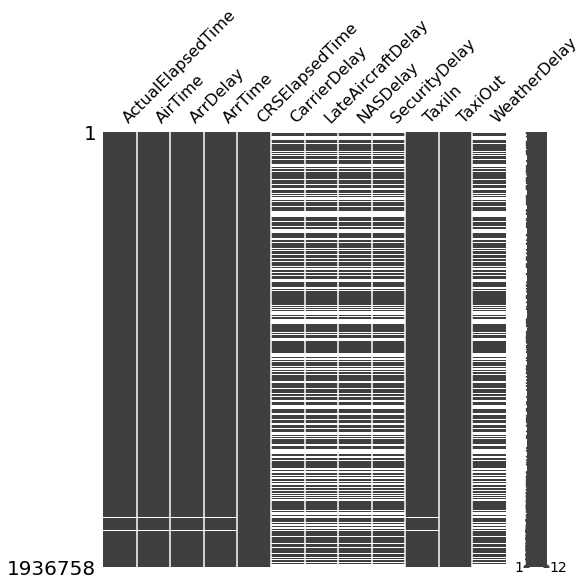

In [ ]:
# Visualize the missing features
# https://github.com/ResidentMario/missingno

# Import the modules
!pip3 install -q missingno==0.5.1
import missingno as msno

# Visualize in matrix form
msno.matrix(df=df.loc[:, df_missing], figsize=(8, 8))

# Time-based Feature Declarations

In [ ]:
# Create seasons according to the "Month" feature
df.insert(loc=4,
          column="Season",
          value=df.Month.values % 12 // 3 + 1)
# Trace
df.sample(n=5, random_state=42)

,Date,Year,Month,DayofMonth,Season,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1935877,2008-12-11,2008,12,11,1,4,1753.0,1747,1944.0,1925,...,28.0,18.0,0,N,0,0.0,0.0,13.0,0.0,6.0
522333,2008-03-22,2008,3,22,2,6,1447.0,1345,1647.0,1550,...,5.0,15.0,0,N,0,0.0,0.0,0.0,0.0,57.0
497983,2008-03-13,2008,3,13,2,4,840.0,830,1132.0,1115,...,4.0,36.0,0,N,0,0.0,0.0,10.0,0.0,7.0
47842,2008-01-07,2008,1,7,1,1,2118.0,2030,2240.0,2145,...,5.0,30.0,0,N,0,48.0,0.0,7.0,0.0,0.0
758247,2008-05-31,2008,5,31,2,6,1206.0,1155,1325.0,1315,...,3.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Import the modules
# !pip3 install -q holidays
from datetime import date
from holidays import US

# Declare US holidays in 2008 and 2009
hdays = US(years=[2008, 2009])

# Create a boolean feature called "isHoliday"
# to declare whether the date is a holiday
df.insert(loc=6,
          column="isHoliday",
          value=df['Date'].isin(hdays)
)
# Create "whichHoliday" feature to specify the holiday
df.insert(loc=7,
          column="whichHoliday",
          value=df.Date.map(hdays)
)
# Trace
df.loc[df.isHoliday == True, ["Date", "isHoliday", "whichHoliday"]]\
    .sample(n=10, random_state=42)

,Date,isHoliday,whichHoliday
322678,2008-02-18,True,Washington's Birthday
179792,2008-01-01,True,New Year's Day
262997,2008-02-18,True,Washington's Birthday
358402,2008-02-18,True,Washington's Birthday
1477992,2008-09-01,True,Labor Day
114324,2008-01-21,True,Martin Luther King Jr. Day
141297,2008-01-21,True,Martin Luther King Jr. Day
164275,2008-01-01,True,New Year's Day
1622367,2008-10-13,True,Columbus Day
51349,2008-01-01,True,New Year's Day


In [ ]:
# Replace NaN values in "whichHoliday" feature with "Not Holiday"
df.loc[df.whichHoliday.isnull().index, "whichHoliday"] = "Not Holiday"

In [ ]:
def num_days_passed_from_hday(d: date, holidays: dict) -> int:
    """Calculates how many days passed from the closest holiday.

    Args:
        d (date): Date.
        holidays (dict): Holiday dates.

    Returns:
        int: The number of days passed from the closest holiday.
    """
    # Return how many days passed from the closest holiday
    return abs(max([dif for dif in [(h - d).days for h in holidays] if dif < 0]))


def num_days_to_hday(d: date, holidays: dict) -> int:
    """Calculate how many days to the closest holiday.

    Args:
        d (date): Date.
        holidays (dict): Holiday dates.

    Returns:
        int: The number of days to the closest holiday
    """
    # Return how many days to the closest holiday
    return min([dif for dif in [(h - d).days for h in holidays] if dif > 0])


def how_many_days(df: pd.DataFrame, feature: str) -> pd.DataFrame:
    """Helper function to avoid duplication while calculating
    how many days passed and to the closest holiday.

    Args:
        df (pd.DataFrame): DataFrame.
        feature (str): Feature name.

    Returns:
        pd.DataFrame: DataFrame with specified feature added.
    """
    # Calculate the number of previous days from the closest holiday
    # Feature and function declarations due to the "feature"
    if feature == "NumDaysPassedFromAHoliday":
        # Feature
        df.insert(loc=8, column=feature, value="")
        # Function
        f = num_days_passed_from_hday
    # If it is "NumDaysToAHoliday"
    else:
        # Feature
        df.insert(loc=9, column=feature, value="")
        # Function
        f = num_days_to_hday
    # Assign zero days if it is a holiday
    df.loc[df.isHoliday == 1, feature] = 0
    # Calculate for the rest
    df.loc[df.isHoliday == 0, feature] = df.loc[df.isHoliday == 0, "Date"].apply(
        func=lambda d: f(d=d.date(), holidays=hdays.keys())
    )
    # Return the frame
    return df


# Calculate how many days passed from the closest holiday
df = how_many_days(df=df, feature="NumDaysPassedFromAHoliday")
# Calculate how many days to the closest holiday
df = how_many_days(df=df, feature="NumDaysToAHoliday")

# Trace
df.loc[
    df.Date == "2008-01-04",
    ["Date", "isHoliday", "NumDaysPassedFromAHoliday", "NumDaysToAHoliday"],
].sample(n=5)

,Date,isHoliday,NumDaysPassedFromAHoliday,NumDaysToAHoliday
47533,2008-01-04,False,3,17
47535,2008-01-04,False,3,17
107373,2008-01-04,False,3,17
3149,2008-01-04,False,3,17
116474,2008-01-04,False,3,17


In [ ]:
# Trace
df.loc[:, ["Date",
           "isHoliday",
           "NumDaysPassedFromAHoliday",
           "NumDaysToAHoliday"]].sample(n=5)

,Date,isHoliday,NumDaysPassedFromAHoliday,NumDaysToAHoliday
623536,2008-04-28,False,70,28
1060911,2008-06-04,False,9,30
1218127,2008-07-04,True,0,0
346905,2008-02-27,False,9,89
160305,2008-01-15,False,14,6


In [ ]:
# Create a feature called "isWeek" to declare
# whether it is a week day or weekend
df.insert(loc=6,
          column="isWeek",
          value=df.DayOfWeek.apply(func=lambda val: True if val < 6 else False)
          )
# Trace
df.loc[df.sample(n=5, random_state=42).index, ["DayOfWeek", "isWeek"]]

,DayOfWeek,isWeek
1935877,4,True
522333,6,False
497983,4,True
47842,1,True
758247,6,False


In [ ]:
def frame_mapping(df: pd.DataFrame, d: dict, feature: str) -> pd.DataFrame:
    """Maps the given dictionary to the given feature in the dataset.

    Args:
        df (pd.DataFrame): The Dataset.
        d (dict): The mapper dictionary.
        feature (str): The feature name.

    Returns:
        pd.DataFrame: The Dataset.
    """
    # Reorganize the given feature to make them a bit more readable
    df.loc[:, feature] = df.loc[:, feature].map(d)
    # Return the dataframe
    return df



# Declare a mapper for "DayOfWeek" variables
dow = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
}
# Convert the "DayOfWeek" as strings
df = frame_mapping(df=df, d=dow, feature="DayOfWeek")
# Trace
df.DayOfWeek.sample(n=5, random_state=42)

1935877    Thursday
522333     Saturday
497983     Thursday
47842        Monday
758247     Saturday
Name: DayOfWeek, dtype: object

In [ ]:
df.loc[df.sample(n=5, random_state=42).index, ["CRSDepTime",
                                               "DepTime",
                                               "DepDelay",
                                               "CRSArrTime",
                                               "ArrTime",
                                               "ArrDelay",
                                               "CarrierDelay"]]

,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CarrierDelay
1935877,1747,1753.0,6.0,1925,1944.0,19.0,0.0
522333,1345,1447.0,62.0,1550,1647.0,57.0,0.0
497983,830,840.0,10.0,1115,1132.0,17.0,0.0
47842,2030,2118.0,48.0,2145,2240.0,55.0,48.0
758247,1155,1206.0,11.0,1315,1325.0,10.0,NaN


In [ ]:
# Import the modules
import numpy as np


def whether_pleasant_flight(val: float) -> str:
    try:
        # If the airplane lands on time or with a minor delay [20 mins]
        if val <= 20.:
            # Return as "Yes"
            return "Yes"
        # If the airplane delays more than 20 mins [up to 60 mins]
        elif 20. < val < 60.:
            # Return as "Neutral"
            return "Neutral"
        # If the airplane delays more than 60 mins
        else:
            # Return as "No"
            return "No"
    except:
        # Return as nan
        return np.nan


# Declare whether a passenger had a pleasant flight
df.loc[:, "isPleasantFlight"] = df.loc[:, "ArrDelay"].apply(func=whether_pleasant_flight)
# Trace
df.loc[df.sample(n=5, random_state=42).index, ["ArrDelay", "isPleasantFlight"]]

,ArrDelay,isPleasantFlight
1935877,19.0,Yes
522333,57.0,Neutral
497983,17.0,Yes
47842,55.0,Neutral
758247,10.0,Yes


In [ ]:
# Declare a mapper for "CancellationCode" variables
cc = {
    "A": "Carrier",
    "B": "Weather",
    "C": "NAS",
    "N": "NotCancelled"
}
# Convert the "CancellationCode" as strings
df = frame_mapping(df=df, d=cc, feature="CancellationCode")
# Trace
df.CancellationCode.sample(n=10, random_state=44)

1278318    NotCancelled
1128907    NotCancelled
897218     NotCancelled
1499652    NotCancelled
877823     NotCancelled
1815346    NotCancelled
1523026    NotCancelled
883159     NotCancelled
1122277    NotCancelled
760606     NotCancelled
Name: CancellationCode, dtype: object

In [ ]:
# Trace the memory consumption before reorganizing the dtypes
mem_before = round(df.memory_usage(deep=True).sum() * 1e-9, 3)

# Declare a dtype mapper
dtypes = dict(
    Year=np.uint16,
    Month=np.uint8,
    DayofMonth=np.uint8,
    Season=np.uint8,
    NumDaysPassedFromAHoliday=np.uint8,
    NumDaysToAHoliday=np.uint8,
    FlightNum=np.uint16,
    TailNum=object,
    ActualElapsedTime=np.float16,
    CRSElapsedTime=np.float16,
    AirTime=np.float16,
    ArrDelay=np.float16,
    DepDelay=np.float16,
    Distance=np.uint16,
    TaxiIn=np.float16,
    TaxiOut=np.float16,
    Cancelled=bool,
    Diverted=bool,
    CarrierDelay=np.float16,
    WeatherDelay=np.float16,
    NASDelay=np.float16,
    SecurityDelay=np.float16,
    LateAircraftDelay=np.float16,
)
# Cast the frame to specified dtype
df = df.astype(dtype=dtypes)

# Trace the difference
print(f"Memory Before: {mem_before} GB, Memory After: {round(df.memory_usage(deep=True).sum() * 1e-9, 3)} GB.")

Memory Before: 1.59 GB, Memory After: 1.212 GB.


In [ ]:
# Trace info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 79018 to 1807143
Data columns (total 37 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date                       datetime64[ns]
 1   Year                       uint16        
 2   Month                      uint8         
 3   DayofMonth                 uint8         
 4   Season                     uint8         
 5   DayOfWeek                  object        
 6   isWeek                     bool          
 7   isHoliday                  bool          
 8   whichHoliday               object        
 9   NumDaysPassedFromAHoliday  uint8         
 10  NumDaysToAHoliday          uint8         
 11  DepTime                    float64       
 12  CRSDepTime                 int64         
 13  ArrTime                    float64       
 14  CRSArrTime                 int64         
 15  UniqueCarrier              object        
 16  FlightNum                  uint1

In [ ]:
# Download and import the modules
from sklearn.impute import SimpleImputer

# Sort the frame according to the "Date" feature
df = df.sort_values(by="Date")

# Create an imputer object
imp = imputer = SimpleImputer(strategy="most_frequent")
# Select only the continous features
df_fill = df.select_dtypes(include="number").copy()
# Fill the missing values [only continous features]
df_fill.loc[:, :] = imp.fit_transform(X=df_fill)
# Put them in the original df
df.loc[:, df_missing] = df_fill.loc[:, df_missing]
# Trace
calc_missing(df)

,num_missing,percent_missing
Date,0,0.0
CRSElapsedTime,0,0.0
ArrDelay,0,0.0
DepDelay,0,0.0
Origin,0,0.0
Dest,0,0.0
Distance,0,0.0
TaxiIn,0,0.0
TaxiOut,0,0.0
Cancelled,0,0.0


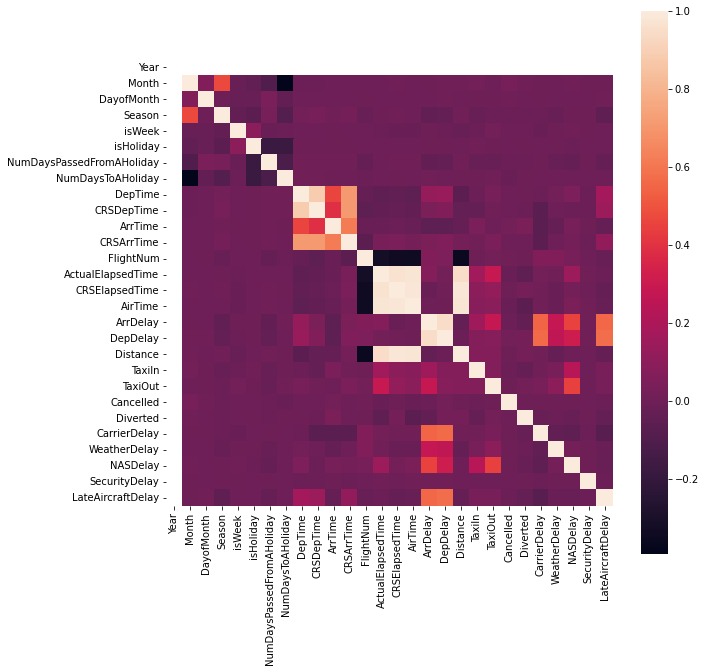

In [ ]:
# Import the modules
import seaborn as sns
import matplotlib.pyplot as plt

# Figure setup
f, ax = plt.subplots(figsize=(10, 10))
# Correlation Matrix
sns.heatmap(data=df.corr(), square=True)
# Plot
plt.show()

In [ ]:
df.select_dtypes(include="number").columns.to_list()

['Year',
 'Month',
 'DayofMonth',
 'Season',
 'NumDaysPassedFromAHoliday',
 'NumDaysToAHoliday',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'FlightNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [ ]:
df.UniqueCarrier.unique()

array(['UA', 'MQ', 'AA', 'NW', 'XE', '9E', 'HA', 'US', 'EV', 'WN', 'DL',
       'OO', 'B6', 'FL', 'AS', 'AQ', 'CO', 'F9', 'OH', 'YV'], dtype=object)

In [ ]:
# Create a "TotalDelay" feature
df.loc[:, "TotalDelay"] = df.DepDelay + df.ArrDelay

In [ ]:
# Declare features for resampling
f2r = [
    "NumDaysPassedFromAHoliday",
    "NumDaysToAHoliday",
    "TotalDelay",
    "TaxiIn",
    "TaxiOut",
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay"
]


def rsmple(df: pd.DataFrame,
           carrier: str,
           features: list,
           rule: str,
           func) -> pd.DataFrame:
    # Apply the resampling by given specs
    df_r = getattr(df.loc[df.UniqueCarrier == carrier, ["Date", *features]]\
                   .set_index(keys="Date", drop=True)\
                   .resample(rule=rule), func)
    # df.apply(), df.Column.mean() > getattr(df, func)
    # Return
    return df_r()


# Resample UA carrier monthly by taking mean
df_r = rsmple(df=df,
              carrier="UA",
              features=f2r,
              rule="M",
              func="mean")
# Trace
df_r

,NumDaysPassedFromAHoliday,NumDaysToAHoliday,TotalDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Date,,,,,,,,,,
2008-01-31,6.940147,13.618570,108.693520,6.728524,19.551570,13.722311,1.785972,12.518704,0.000000,25.223180
2008-02-29,13.353003,39.161467,101.759152,6.665489,19.653236,12.048034,2.065549,11.913328,0.006765,23.490040
2008-03-31,27.723250,70.276750,91.791166,6.431776,18.213845,11.277829,0.975331,9.412735,0.077166,22.008171
2008-04-30,56.796310,41.203690,90.171321,6.243270,18.517400,11.652495,0.938784,8.828008,0.000000,21.398239
2008-05-31,69.618981,16.432718,87.977985,6.319509,18.946158,10.570828,0.923895,8.935191,0.000000,21.744805
2008-06-30,20.802918,18.197082,110.398350,6.527745,21.566192,13.021765,1.363430,13.016802,0.000000,27.511361
2008-07-31,15.721893,40.800789,103.289025,6.550859,20.673570,12.639265,1.676810,10.411313,0.008171,25.106861
2008-08-31,40.436584,18.563416,100.271818,6.835079,18.862695,12.584749,1.662167,8.022574,0.018773,24.915988
2008-09-30,13.841633,27.039343,84.179905,6.435881,18.590637,11.618650,1.582047,9.045319,0.000000,17.173431


Questions;
1. When is the best time of day/day of week/time of year to fly to minimise delays?
2. Do older planes suffer more delays?
3. How does the number of people flying between different locations change over time?
4. How well does weather predict plane delays?
5. Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?

In [ ]:
# Answer of the first question: When is the best time of
# day/day of week/time of year to fly to minimise delays?

# Declare columns to focus
cols_dom = ["Date", "Month", "DayofMonth", "TotalDelay"]
# Resample daily by taking mean
df.loc[:, cols_dom]\
        .set_index(keys="Date", drop=True)\
        .resample(rule="D")\
        .mean()\
        .sort_values(by="TotalDelay")\
        .astype(dtype={
            "Month": np.uint8,
            "DayofMonth": np.uint8
        })

,Month,DayofMonth,TotalDelay
Date,,,
2008-10-14,10,14,47.760095
2008-09-20,9,20,49.641509
2008-11-28,11,28,49.855415
2008-10-18,10,18,50.888432
2008-11-17,11,17,51.374674
...,...,...,...
2008-02-12,2,12,131.020361
2008-12-19,12,19,135.766643
2008-07-27,7,27,135.965440


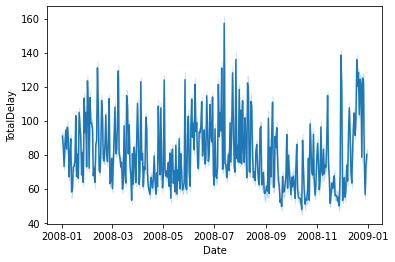

In [ ]:
# Lineplot of resampling
sns.lineplot(x="Date",
             y="TotalDelay",
             data=df)